FILE FOR GAINING INTUITION. ALL ACTUAL EXPERIMENTS DONE IN THEIR RESPECTIVE DIRECTORY

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv("data/spambase_augmented.csv")

In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

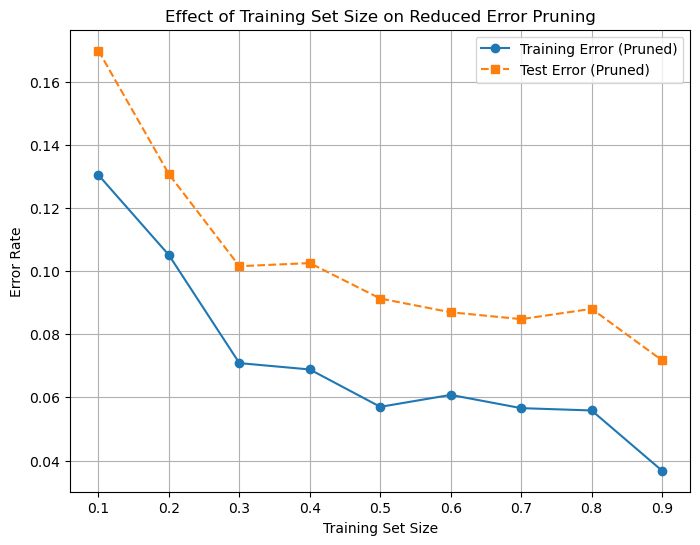

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, _tree

train_sizes = np.linspace(0.1, 0.9, 9)  # Train sizes from 10% to 90%
train_error = []
test_error = []

def prune_tree(tree, X_val, y_val):
    """
    Prune a decision tree by iteratively removing nodes if it improves validation accuracy.
    """
    def prune_node(node):
        """
        Recursively prune the tree starting from the leaves.
        """
        if tree.tree_.children_left[node] != _tree.TREE_LEAF:
            # Recursively prune left and right children
            prune_node(tree.tree_.children_left[node])
            prune_node(tree.tree_.children_right[node])

            # Backup original predictions
            left_child, right_child = tree.tree_.children_left[node], tree.tree_.children_right[node]
            original_values = tree.tree_.value[node].copy()

            # Make the node a leaf by setting its children to -1
            tree.tree_.children_left[node] = _tree.TREE_LEAF
            tree.tree_.children_right[node] = _tree.TREE_LEAF

            # Compute validation accuracy after pruning
            y_val_pred = tree.predict(X_val)
            pruned_accuracy = accuracy_score(y_val, y_val_pred)

            # Restore the original node if pruning didn't improve accuracy
            if pruned_accuracy < prune_tree.best_val_accuracy:
                tree.tree_.children_left[node] = left_child
                tree.tree_.children_right[node] = right_child
                tree.tree_.value[node] = original_values
            else:
                prune_tree.best_val_accuracy = pruned_accuracy  # Update best accuracy

    prune_tree.best_val_accuracy = accuracy_score(y_val, clf.predict(X_val))  # Store best accuracy
    prune_node(0)  # Start pruning from the root

# Vary training size
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42, stratify=y)

    # Further split training set for validation (10% of train size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Apply pruning
    prune_tree(clf, X_val, y_val)

    # Compute train error
    y_train_pred = clf.predict(X_train)
    cur_training_err = 1 - accuracy_score(y_train, y_train_pred)

    # Compute test error
    y_test_pred = clf.predict(X_test)
    cur_test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_error.append(cur_training_err)
    test_error.append(cur_test_error)

# Plot results
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_error, label="Training Error (Pruned)", marker='o', linestyle='-')
plt.plot(train_sizes, test_error, label="Test Error (Pruned)", marker='s', linestyle='--')
plt.xlabel("Training Set Size")
plt.ylabel("Error Rate")
plt.title("Effect of Training Set Size on Reduced Error Pruning")
plt.legend()
plt.grid(True)
plt.show()

DEPTH = 4

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 
print(df.shape)
print(X.shape)
print(y.shape)

(4600, 1186)
(4600, 1185)
(4600,)


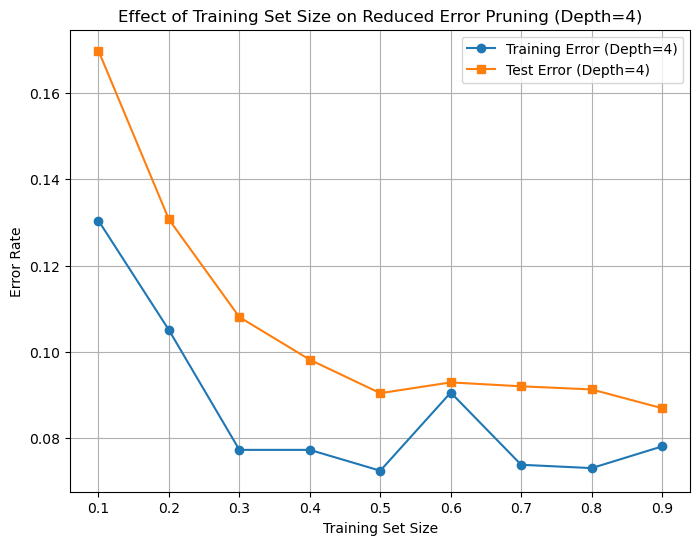

In [6]:
train_sizes = np.linspace(0.1, 0.9, 9)

# Function for reduced error pruning
def prune_tree(tree, X_val, y_val):
    """
    Prune a decision tree by iteratively removing nodes if it improves validation accuracy.
    """
    def prune_node(node):
        """
        Recursively prune the tree starting from the leaves.
        """
        if tree.tree_.children_left[node] != _tree.TREE_LEAF:
            # Recursively prune left and right children
            prune_node(tree.tree_.children_left[node])
            prune_node(tree.tree_.children_right[node])

            # Backup original predictions
            left_child, right_child = tree.tree_.children_left[node], tree.tree_.children_right[node]
            original_values = tree.tree_.value[node].copy()

            # Make the node a leaf by setting its children to -1
            tree.tree_.children_left[node] = _tree.TREE_LEAF
            tree.tree_.children_right[node] = _tree.TREE_LEAF

            # Compute validation accuracy after pruning
            y_val_pred = tree.predict(X_val)
            pruned_accuracy = accuracy_score(y_val, y_val_pred)

            # Restore the original node if pruning didn't improve accuracy
            if pruned_accuracy < prune_tree.best_val_accuracy:
                tree.tree_.children_left[node] = left_child
                tree.tree_.children_right[node] = right_child
                tree.tree_.value[node] = original_values
            else:
                prune_tree.best_val_accuracy = pruned_accuracy  # Update best accuracy

    prune_tree.best_val_accuracy = accuracy_score(y_val, tree.predict(X_val))  # Store best accuracy
    prune_node(0)  # Start pruning from the root

# Experimenting with depth = 4
max_depth = 4
train_error = []
test_error = []

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42, stratify=y)

    # Ensure validation set is at least 3 samples (since we have 3 classes)
    val_size = max(3, int(0.1 * len(X_train)))

    if len(X_train) > val_size:
        stratify_option = y_train if len(set(y_train)) == len(set(y)) else None
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42, stratify=stratify_option)
    else:
        X_val, y_val = X_train, y_train  # Use entire training set as validation if too small

    clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    clf.fit(X_train, y_train)

    # Apply pruning
    prune_tree(clf, X_val, y_val)

    # Compute train error
    y_train_pred = clf.predict(X_train)
    cur_training_err = 1 - accuracy_score(y_train, y_train_pred)

    # Compute test error
    y_test_pred = clf.predict(X_test)
    cur_test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_error.append(cur_training_err)
    test_error.append(cur_test_error)

# Plot results
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_error, label="Training Error (Depth=4)", marker='o', linestyle='-')
plt.plot(train_sizes, test_error, label="Test Error (Depth=4)", marker='s', linestyle='-')
plt.xlabel("Training Set Size")
plt.ylabel("Error Rate")
plt.title("Effect of Training Set Size on Reduced Error Pruning (Depth=4)")
plt.legend()
plt.grid(True)
plt.show()

DEPTH = 8

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 
print(df.shape)
print(X.shape)
print(y.shape)

(4600, 1186)
(4600, 1185)
(4600,)


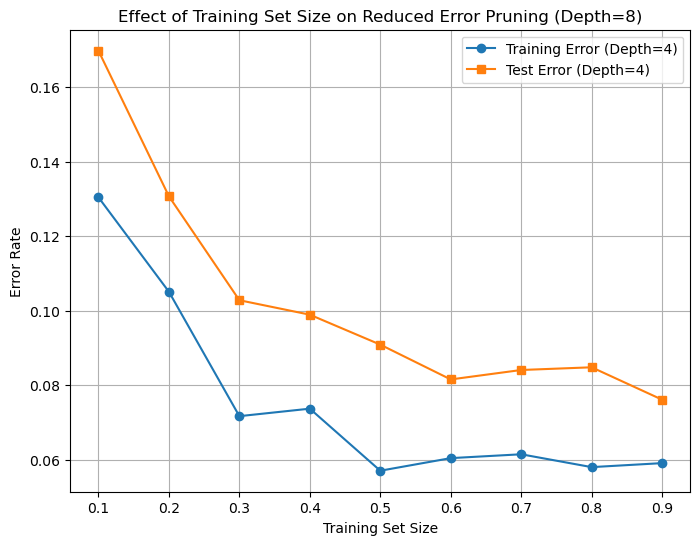

In [12]:
train_sizes = np.linspace(0.1, 0.9, 9)

# Function for reduced error pruning
def prune_tree(tree, X_val, y_val):
    """
    Prune a decision tree by iteratively removing nodes if it improves validation accuracy.
    """
    def prune_node(node):
        """
        Recursively prune the tree starting from the leaves.
        """
        if tree.tree_.children_left[node] != _tree.TREE_LEAF:
            # Recursively prune left and right children
            prune_node(tree.tree_.children_left[node])
            prune_node(tree.tree_.children_right[node])

            # Backup original predictions
            left_child, right_child = tree.tree_.children_left[node], tree.tree_.children_right[node]
            original_values = tree.tree_.value[node].copy()

            # Make the node a leaf by setting its children to -1
            tree.tree_.children_left[node] = _tree.TREE_LEAF
            tree.tree_.children_right[node] = _tree.TREE_LEAF

            # Compute validation accuracy after pruning
            y_val_pred = tree.predict(X_val)
            pruned_accuracy = accuracy_score(y_val, y_val_pred)

            # Restore the original node if pruning didn't improve accuracy
            if pruned_accuracy < prune_tree.best_val_accuracy:
                tree.tree_.children_left[node] = left_child
                tree.tree_.children_right[node] = right_child
                tree.tree_.value[node] = original_values
            else:
                prune_tree.best_val_accuracy = pruned_accuracy  # Update best accuracy

    prune_tree.best_val_accuracy = accuracy_score(y_val, tree.predict(X_val))  # Store best accuracy
    prune_node(0)  # Start pruning from the root

# Experimenting with depth = 4
max_depth = 8
train_error = []
test_error = []

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42, stratify=y)

    # Ensure validation set is at least 3 samples (since we have 3 classes)
    val_size = max(3, int(0.1 * len(X_train)))

    if len(X_train) > val_size:
        stratify_option = y_train if len(set(y_train)) == len(set(y)) else None
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42, stratify=stratify_option)
    else:
        X_val, y_val = X_train, y_train  # Use entire training set as validation if too small

    clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    clf.fit(X_train, y_train)

    # Apply pruning
    prune_tree(clf, X_val, y_val)

    # Compute train error
    y_train_pred = clf.predict(X_train)
    cur_training_err = 1 - accuracy_score(y_train, y_train_pred)

    # Compute test error
    y_test_pred = clf.predict(X_test)
    cur_test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_error.append(cur_training_err)
    test_error.append(cur_test_error)

# Plot results
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_error, label="Training Error (Depth=4)", marker='o', linestyle='-')
plt.plot(train_sizes, test_error, label="Test Error (Depth=4)", marker='s', linestyle='-')
plt.xlabel("Training Set Size")
plt.ylabel("Error Rate")
plt.title("Effect of Training Set Size on Reduced Error Pruning (Depth=8)")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
df = pd.read_csv("data/spambase_augmented.csv")

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 
print(df.shape)
print(X.shape)
print(y.shape)

(4600, 1186)
(4600, 1185)
(4600,)


In [9]:
from sklearn.ensemble import AdaBoostClassifier

c:\Users\aryap\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aryap\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aryap\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aryap\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ary

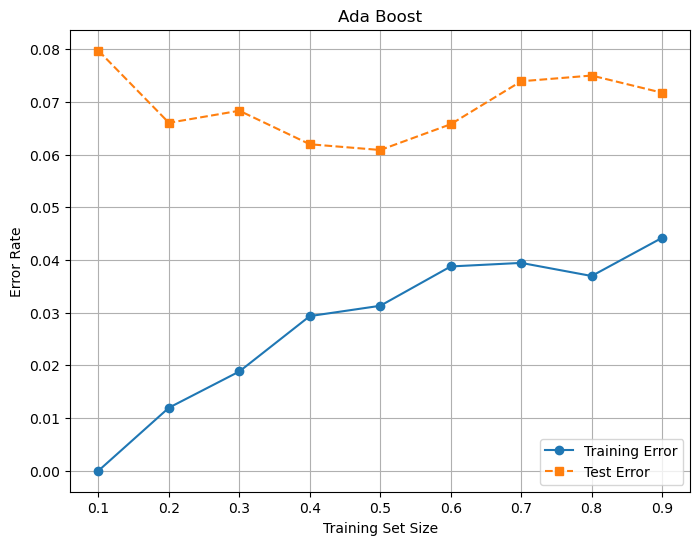

In [10]:
train_error = []
test_error = []
train_sizes = np.linspace(0.1, 0.9, 9)

for train_size in train_sizes:
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=train_size,random_state=42)
    clf = AdaBoostClassifier()
    clf.fit(X_train,y_train)

    #train error
    y_train_pred = clf.predict(X_train)
    cur_training_err = 1 - accuracy_score(y_train, y_train_pred)

    # Compute test error
    y_test_pred = clf.predict(X_test)
    cur_test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_error.append(cur_training_err)
    test_error.append(cur_test_error)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_error, label="Training Error", marker='o', linestyle='-')
plt.plot(train_sizes, test_error, label="Test Error ", marker='s', linestyle='--')
plt.xlabel("Training Set Size")
plt.ylabel("Error Rate")    
plt.title(f"Ada Boost")
plt.legend()
plt.grid(True)
plt.show()